Step 1: Downloading and Loading the Iris Dataset...
Dataset successfully loaded!


Step 2: Exploring the Dataset...

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa   

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null

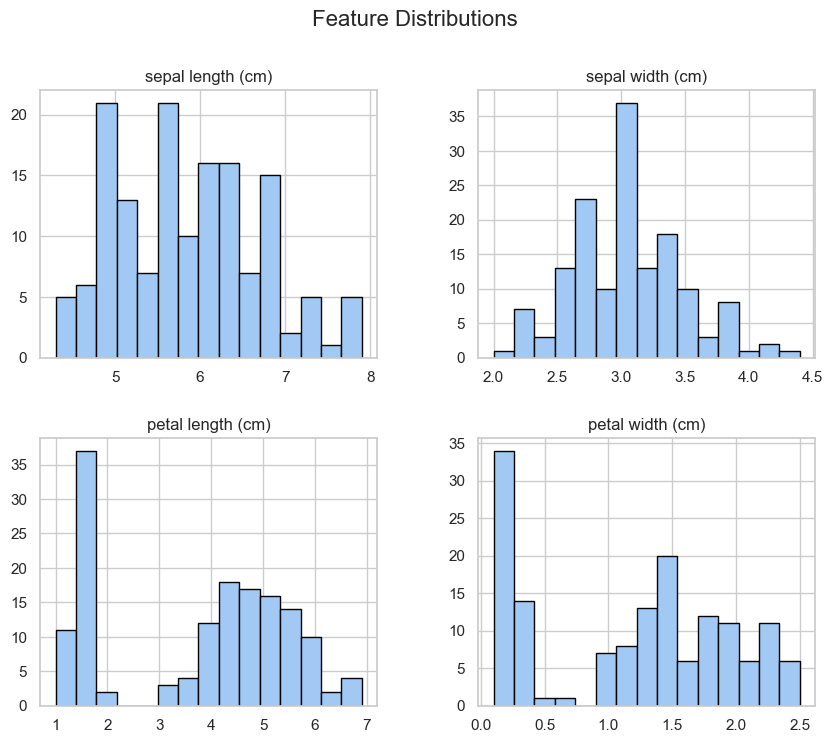

Generating Scatter Plot Matrix...


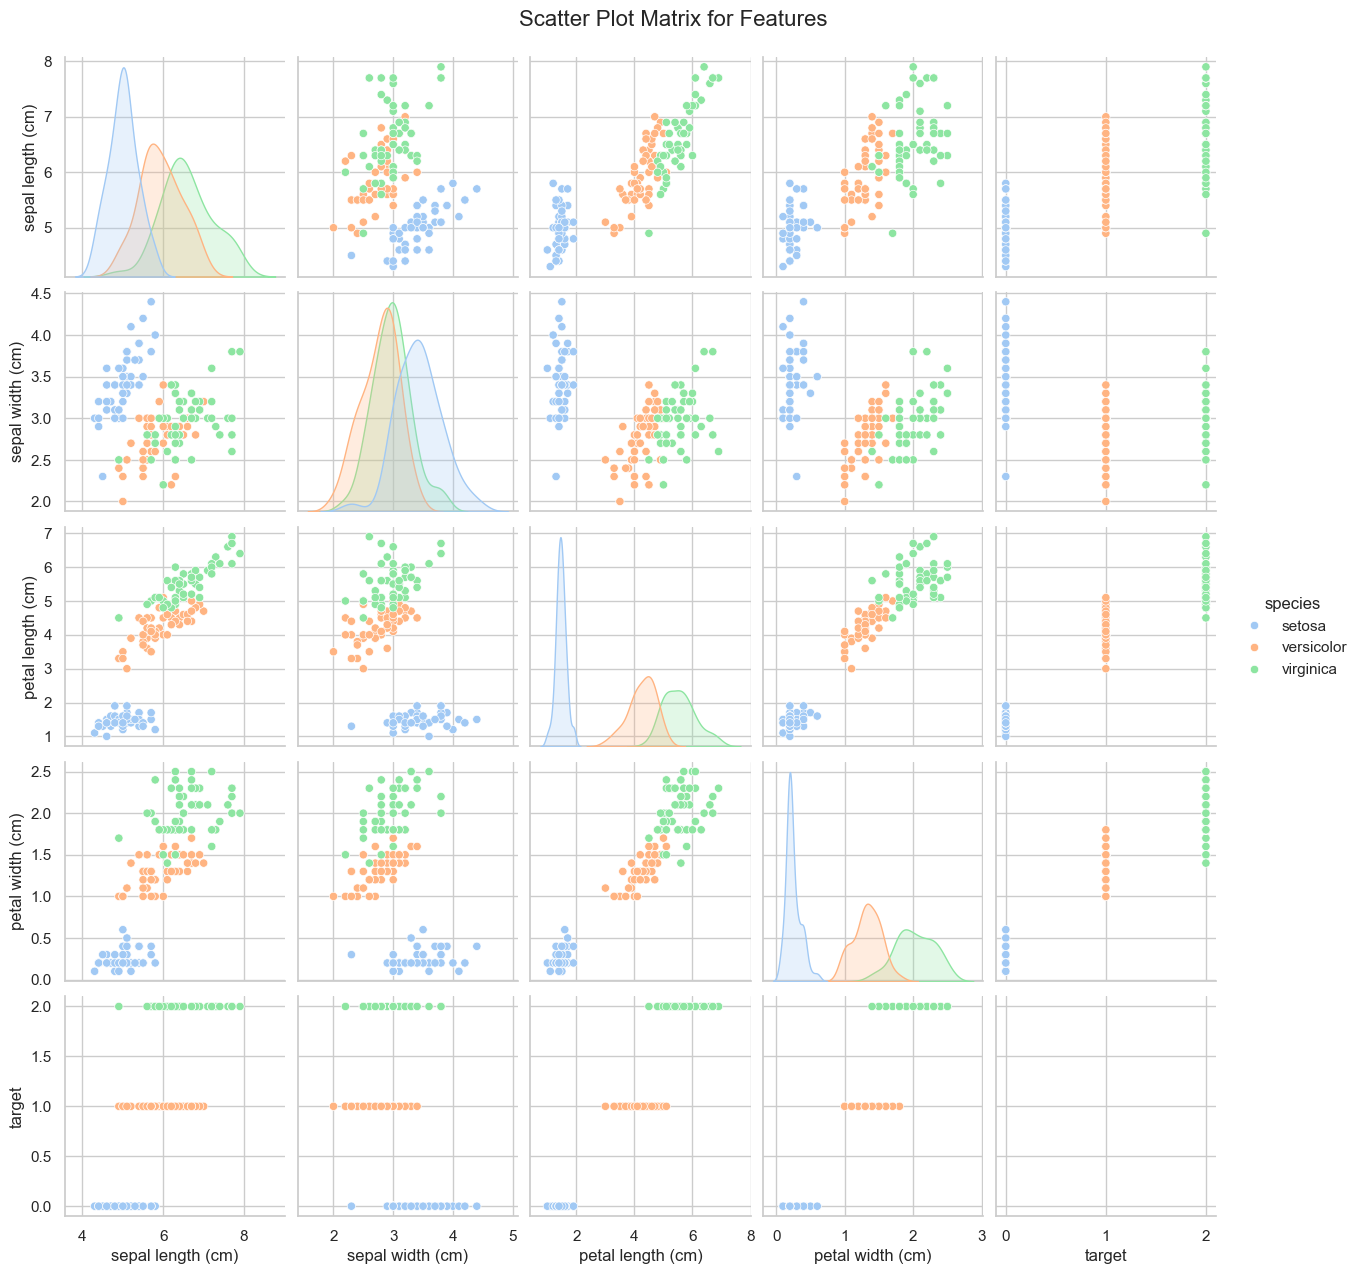

Generating Box Plots for feature comparisons across species...


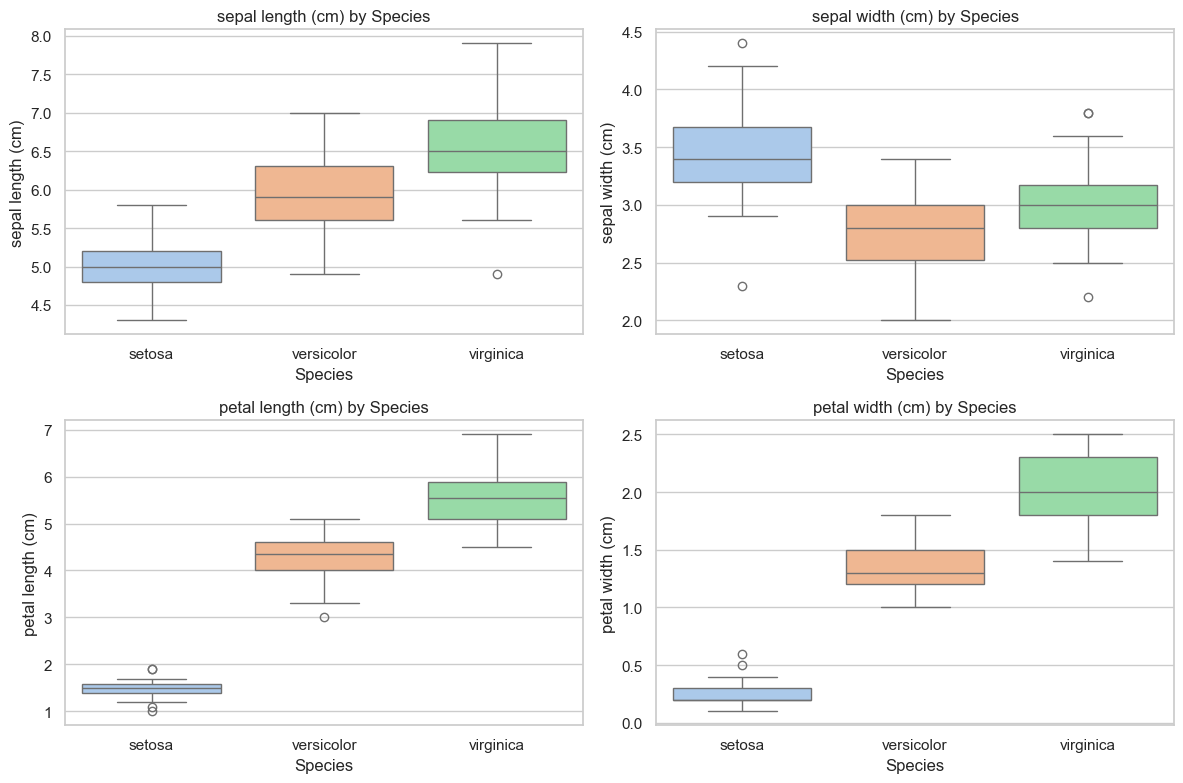


Step 6: Making Initial Observations...
Observations:
1. Setosa species has the smallest petal length and width compared to other species.
2. Virginica species tends to have the largest petal length and width.
3. Sepal length and width do not have as strong a correlation as petal length and width.
4. Overall, petal-related features are more distinguishing among species.



In [2]:
#TASK 2 -(KERNEL SYNERGY INTERNSHIP)
#TO DEVELOP A PRODUCTION LEVEL NOTES TAKING API
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set visualization style and pastel palette
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("pastel", 3)  # Limit palette to 3 colors (one for each species)

# -------------------------
# Step 1: Download and Load Dataset
# -------------------------
def download_and_load_dataset():
    """
    Load the Iris dataset into a Pandas DataFrame.
    Returns:
        iris_df (DataFrame): A DataFrame containing the Iris dataset.
    """
    print("Step 1: Downloading and Loading the Iris Dataset...")
    iris = load_iris()  # Load dataset from sklearn
    iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Create DataFrame
    iris_df['target'] = iris.target  # Add target column
    iris_df['species'] = iris_df['target'].map(dict(enumerate(iris.target_names)))  # Add species names
    print("Dataset successfully loaded!\n")
    return iris_df

# -------------------------
# Step 2: Basic Dataset Exploration
# -------------------------
def explore_dataset(data):
    """
    Explore the dataset by displaying basic information and structure.
    Args:
        data (DataFrame): The dataset to explore.
    """
    print("\nStep 2: Exploring the Dataset...")
    print("\nFirst 5 rows of the dataset:")
    print(data.head(), "\n")
    
    print("Dataset information:")
    data.info()
    
    print("\nSummary statistics of numerical columns:")
    print(data.describe(), "\n")
    
    print("Checking for missing values:")
    print(data.isnull().sum(), "\n")

# -------------------------
# Step 3: Data Cleaning and Processing
# -------------------------
def clean_and_process_data(data):
    """
    Perform data cleaning and preprocessing tasks.
    Args:
        data (DataFrame): The dataset to clean.
    Returns:
        data (DataFrame): The cleaned dataset.
    """
    print("\nStep 3: Cleaning and Processing the Dataset...")
    
    # Check and handle missing values (if any)
    print("Handling missing values (if any):")
    if data.isnull().sum().sum() == 0:
        print("No missing values found in the dataset.\n")
    else:
        data.fillna(data.mean(), inplace=True)  # Fill missing values with column means
        print("Missing values filled with column means.\n")
    
    # Check data types and convert if necessary
    print("Checking and converting data types (if required):")
    print(data.dtypes, "\n")
    # In this dataset, no conversion is needed as all data types are appropriate.
    
    return data

# -------------------------
# Step 4: Basic Descriptive Statistics
# -------------------------
def compute_statistics(data):
    """
    Compute basic statistics like mean, median, and mode.
    Args:
        data (DataFrame): The dataset for which statistics are computed.
    """
    print("\nStep 4: Computing Basic Descriptive Statistics...")
    print("Mean of the features:")
    print(data.iloc[:, :-2].mean(), "\n")
    
    print("Median of the features:")
    print(data.iloc[:, :-2].median(), "\n")
    
    print("Mode of the features:")
    print(data.iloc[:, :-2].mode(), "\n")

# -------------------------
# Step 5: Data Visualization
# -------------------------
def visualize_data(data):
    """
    Create histograms, scatter plots, and box plots for data visualization.
    Args:
        data (DataFrame): The dataset to visualize.
    """
    print("\nStep 5: Visualizing the Data...")
    
    # Histogram (using pastel colors)
    print("Generating Histograms for all numerical features...")
    data.iloc[:, :-2].hist(figsize=(10, 8), bins=15, color=pastel_palette[0], edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()
    
    # Scatter plot (using pastel colors)
    print("Generating Scatter Plot Matrix...")
    sns.pairplot(data, hue='species', palette=pastel_palette, diag_kind='kde', height=2.5)
    plt.suptitle("Scatter Plot Matrix for Features", fontsize=16, y=1.02)
    plt.show()
    
    # Box plots (using pastel colors)
    print("Generating Box Plots for feature comparisons across species...")
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(data.columns[:-2], 1):
        plt.subplot(2, 2, i)
        # Use hue parameter to avoid warning, set legend=False to suppress the warning
        sns.boxplot(x='species', y=column, data=data, palette=pastel_palette, hue='species')
        plt.title(f"{column} by Species")
        plt.xlabel("Species")
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# -------------------------
# Step 6: Initial Observations
# -------------------------
def initial_observations(data):
    """
    Make initial observations about the data.
    Args:
        data (DataFrame): The dataset to analyze.
    """
    print("\nStep 6: Making Initial Observations...")
    print("Observations:")
    print("1. Setosa species has the smallest petal length and width compared to other species.")
    print("2. Virginica species tends to have the largest petal length and width.")
    print("3. Sepal length and width do not have as strong a correlation as petal length and width.")
    print("4. Overall, petal-related features are more distinguishing among species.\n")

# -------------------------
# Main Function
# -------------------------
if __name__ == "__main__":
    # Step 1: Download and Load Dataset
    iris_df = download_and_load_dataset()
    
    # Step 2: Explore Dataset
    explore_dataset(iris_df)
    
    # Step 3: Data Cleaning and Processing
    iris_df = clean_and_process_data(iris_df)
    
    # Step 4: Compute Basic Descriptive Statistics
    compute_statistics(iris_df)
    
    # Step 5: Visualize Data
    visualize_data(iris_df)
    
    # Step 6: Initial Observations
    initial_observations(iris_df)